# Best practices for constructing, preparing, and evaluating protein-ligand binding affinity benchmarks

### DavidHahn1*, HannahE.BruceMacdonald2, LauraPerezBenito3, JohnD.Chodera2, AntoniaS.J.S.Mey4, DavidL.Mobley5, GaryTresadern6

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from arsenic import stats

import pandas as pd
import sys
from matplotlib import cm
from matplotlib import colors
import colorsys
from matplotlib import rc
font = {'size'   : 14}
rc('font', **font)
# change font
plt.rcParams['font.sans-serif'] = "Helvetica"
plt.rcParams['font.family'] = "sans-serif"


In [2]:
### TOY DATA TO PLOT

y = [-1.61, 0.59, 0.81, -0.17, 2.49, 0.07, -0.44, -0.19, 0.89, 2.00, 1.13, 0.35, -0.37, -0.54, -1.01, 0.12, 1.12, 1.02, 2.20, 1.68, 0.61, 2.74, -0.67, -0.00]
x = [-1.28, 1.79, -0.16, 0.22, 2.36, 0.79, 0.02, -0.42, 0.30, 0.75, 1.32, 1.77, -0.39, -0.78, -0.54, -0.76, -0.04, -0.57, 0.95, -0.49, -2.49, 1.79, 1.44, 1.23]

x_errors = [0.22 for _ in x]
y_errors = [np.random.normal(0.3,0.2) for _ in x]

#### Figure XX Measuring success section


A) correct plot style

B + C) x !=y because of limits (B) and plot shape (C)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


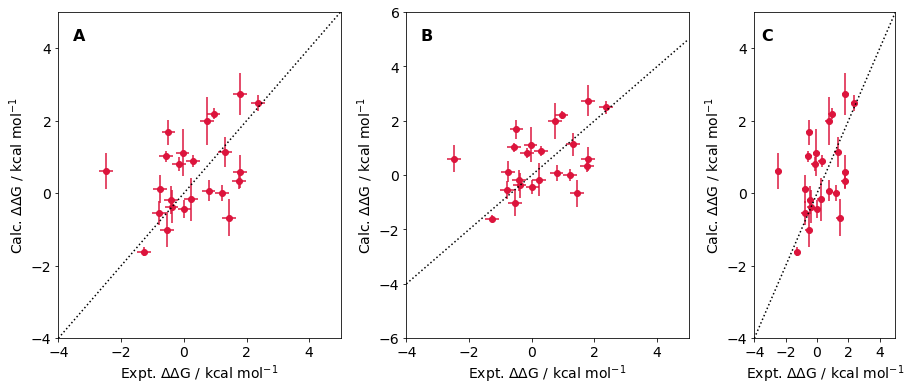

In [3]:
# sns.set_context('talk')

f, axes = plt.subplots(1,3, gridspec_kw={'width_ratios': [1, 1, 0.5]},figsize=(15,6))


for i, label in enumerate(('A', 'B', 'C')):
        axes[i].errorbar(x, y,xerr=x_errors,yerr=y_errors,linestyle='none',color='crimson')
        axes[i].scatter(x, y,color='crimson')

        xlimit = axes[i].get_xlim()
        ylimit = axes[i].get_ylim()
        limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
        axes[i].plot(limit,limit, 'k:')
        axes[i].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
        axes[i].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

        axes[i].set_xlim(limit)
        axes[i].set_ylim(limit)
        
        axes[i].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
        axes[i].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')

        axes[i].text(0.05, 0.95, label, transform=axes[i].transAxes,
          fontsize=16, fontweight='bold', va='top')
        
axes[1].set_ylim(-6,6)
axes[1].set_yticks(np.arange(-6,7, 2.0))

plt.subplots_adjust(wspace=0.28)
plt.savefig('plotting-basics.pdf')
plt.show()


In [4]:
# # sns.set_context('talk')

# x = x[:10]
# y = y[:10]
# x_errors = x_errors[:10]
# y_errors = y_errors[:10]
# results = {}

# # original
# results['Original'] = {'x':x, 'y':y,'xerr':x_errors,'yerr':y_errors}

# pos_X = []
# pos_Y = []
# for i,j in zip(x,y):
#     if i < 0:
#         pos_X.append(-i)
#         pos_Y.append(-j)
#     else:
#         pos_X.append(i)
#         pos_Y.append(j)        

# results['All positive'] = {'x':pos_X, 'y':pos_Y,'xerr':x_errors,'yerr':y_errors}


# double_X = []
# double_Y = []
# double_Xerr = []
# double_Yerr = []
# for i,j,erri,errj in zip(x,y,x_errors, y_errors):
#     double_X.append(-i)
#     double_Y.append(-j)
#     double_X.append(i)
#     double_Y.append(j)    
#     double_Xerr.append(erri)
#     double_Yerr.append(errj)
#     double_Xerr.append(erri)
#     double_Yerr.append(errj)        

# results['Double'] = {'x':double_X, 'y':double_Y,'xerr':double_Xerr,'yerr':double_Yerr}


# f, axes = plt.subplots(len(results),1,figsize=(3.25,3.25*len(results)), sharex=True,sharey=True)

# for i, (label, results) in enumerate(results.items()):
#     axes[i].errorbar(results['x'], results['y'], xerr=results['xerr'],yerr=results['yerr'],linestyle='none',color='crimson')
#     axes[i].scatter(results['x'], results['y'],color='crimson')
#     R2 = stats.bootstrap_statistic(results['x'], results['y'],dy_true=results['xerr'],dy_pred=results['yerr'],statistic='R2')['mle']
#     xlimit = axes[i].get_xlim()
#     ylimit = axes[i].get_ylim()
#     limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
#     axes[i].plot(limit,limit, 'k:')
#     axes[i].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
#     axes[i].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

#     axes[i].set_xlim(limit)
#     axes[i].set_ylim(limit)

#     axes[i].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
#     axes[i].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')

#     axes[i].text(0.05, 0.95, label+f'\nR$^2$: {R2:.2f}\nN: {len(results["x"])}', transform=axes[i].transAxes,
#       fontsize=12, fontweight='bold', va='top')

    


# plt.subplots_adjust(wspace=0.28)
# plt.savefig('doublevalues.png')
# plt.show()

In [5]:
# f, axes = plt.subplots(3,2,figsize=(7.5,7.5*1.5),sharey='col')
# n = 10
# x = x[:n]
# y = y[:n]
# x_errors = x_errors[:n]
# y_errors = y_errors[:n]

# import itertools
# import copy
# import tqdm
# historyR = []
# historyrho = []
# historytau = []


# for combinations in tqdm.tqdm(itertools.product([0, 1], repeat=len(x))):
#     temp_x = copy.copy(x)
#     temp_y = copy.copy(y)
#     for i,com in enumerate(combinations):
#         if bool(com):
#             temp_x[i] = -temp_x[i]
#             temp_y[i] = -temp_y[i]    
            

#     results = stats.bootstrap_statistic(temp_x,temp_y,statistic='R2',nbootstrap=100)
#     historyR.append(results['mle'])
#     results = stats.bootstrap_statistic(temp_x,temp_y,statistic='KTAU',nbootstrap=100)
#     historytau.append(results['mle'])
#     results = stats.bootstrap_statistic(temp_x,temp_y,statistic='rho',nbootstrap=100)
#     historyrho.append(results['mle'])
# axes[0][1].hist(historyR,bins=np.linspace(0.,1.,21),color='grey',alpha=0.5)  

# axes[1][1].hist(historytau,bins=np.linspace(0.,1.,21),color='grey',alpha=0.5)  

# axes[2][1].hist(historyrho,bins=np.linspace(0.,1.,21),color='grey',alpha=0.5)  


# stat = [r'R$^2$',r'Kendall $\tau$',r'$\rho$']
# for i in range(0,3):
#     axes[i][1].set_xlabel(stat[i])



# results = {}

# # original
# results['Original'] = {'x':x, 'y':y,'xerr':x_errors,'yerr':y_errors}

# pos_X = []
# pos_Y = []
# for i,j in zip(x,y):
#     if i < 0:
#         pos_X.append(-i)
#         pos_Y.append(-j)
#     else:
#         pos_X.append(i)
#         pos_Y.append(j)        

# results['All positive'] = {'x':pos_X, 'y':pos_Y,'xerr':x_errors,'yerr':y_errors}


# double_X = []
# double_Y = []
# double_Xerr = []
# double_Yerr = []
# for i,j,erri,errj in zip(x,y,x_errors, y_errors):
#     double_X.append(-i)
#     double_Y.append(-j)
#     double_X.append(i)
#     double_Y.append(j)    
#     double_Xerr.append(erri)
#     double_Yerr.append(errj)
#     double_Xerr.append(erri)
#     double_Yerr.append(errj)        

# results['Double'] = {'x':double_X, 'y':double_Y,'xerr':double_Xerr,'yerr':double_Yerr}


# colors = ['crimson','green','blue']

# for i, (label, results) in enumerate(results.items()):
#     axes[i][0].errorbar(results['x'], results['y'], xerr=results['xerr'],yerr=results['yerr'],linestyle='none',color=colors[i])
#     axes[i][0].scatter(results['x'], results['y'],color=colors[i])
#     xlimit = axes[i][0].get_xlim()
#     ylimit = axes[i][0].get_ylim()
#     limit = (np.floor(min([xlimit[0],ylimit[0]])-0.5),np.ceil(max([xlimit[1],ylimit[1]])+0.5))
#     axes[i][0].set_xticks(np.arange(limit[0],limit[1]+1, 2.0))
#     axes[i][0].set_yticks(np.arange(limit[0],limit[1]+1, 2.0))

#     axes[i][0].set_xlim(limit)
#     axes[i][0].set_ylim(limit)

#     axes[i][0].set_xlabel('Expt. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
#     axes[i][0].set_ylabel('Calc. '+r'$\Delta\Delta$G'+' / kcal mol'+r'$^{-1}$')
#     R2 = stats.bootstrap_statistic(results['x'], results['y'],dy_true=results['xerr'],dy_pred=results['yerr'],statistic='R2')['mle']
#     axes[0][1].vlines(R2,0.,50.,color=colors[i])
#     tau = stats.bootstrap_statistic(results['x'], results['y'],dy_true=results['xerr'],dy_pred=results['yerr'],statistic='KTAU')['mle']
#     axes[1][1].vlines(tau,0.,50.,color=colors[i])
#     rho = stats.bootstrap_statistic(results['x'], results['y'],dy_true=results['xerr'],dy_pred=results['yerr'],statistic='rho')['mle']
#     axes[2][1].vlines(rho,0.,50.,color=colors[i])
#     axes[i][0].text(0.05, 0.95, label+f'\nN: {len(results["x"])}\nR$^2$: {R2:.2f}\n'+r'$\tau$:'+f' {tau:.2f}'+'\n'+r'$\rho$:'+f' {rho:.2f}', transform=axes[i][0].transAxes,
#       fontsize=12, fontweight='bold', va='top')
    
    
# for i in range(0,3):
#     axes[i][0].set_xlim(limit)
#     axes[i][0].set_ylim(limit)
#     axes[i][0].plot(limit,limit, 'k:')
#     axes[i][0].plot(limit,[0,0], 'k--',alpha=0.3)
#     axes[i][0].plot([0,0],limit, 'k--',alpha=0.3)
#     axes[i][1].set_xlim(0.,1.)
# plt.subplots_adjust(wspace=0.28)
# plt.savefig('doublevalues.pdf')
# plt.show()

In [6]:
n = 10
x = x[:n]
y = y[:n]
x_errors = x_errors[:n]
y_errors = y_errors[:n]

results = {}

import itertools
import copy
import tqdm
historyR = []
historyrho = []
historytau = []

best_r = 0.
worst_r = 1.
best_rho = 0.
worst_rho = 1. 
best_tau = 0.
worst_tau = 1.


for combinations in tqdm.tqdm(itertools.product([0, 1], repeat=len(x))):
    temp_x = copy.copy(x)
    temp_y = copy.copy(y)
    for i,com in enumerate(combinations):
        if bool(com):
            temp_x[i] = -temp_x[i]
            temp_y[i] = -temp_y[i]    
            

    r = stats.bootstrap_statistic(temp_x,temp_y,statistic='R2',nbootstrap=100)
    historyR.append(r['mle'])
    if r['mle'] < worst_r:
        results['worst R'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        worst_r = r['mle']
    if r['mle'] > best_r:
        results['best R'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        best_r = r['mle']
        

    r = stats.bootstrap_statistic(temp_x,temp_y,statistic='KTAU',nbootstrap=100)
    historytau.append(r['mle'])
    if r['mle'] < worst_tau:
        results['worst tau'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        worst_tau = r['mle']
    if r['mle'] > best_tau:
        results['best tau'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        best_tau = r['mle']
        
    r = stats.bootstrap_statistic(temp_x,temp_y,statistic='rho',nbootstrap=100)
    historyrho.append(r['mle'])
    if r['mle'] < worst_rho:
        results['worst rho'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        worst_rho = r['mle']
    if r['mle'] > best_rho:
        results['best rho'] = {'x':temp_x, 'y':temp_y,'xerr':x_errors,'yerr':y_errors}
        best_rho = r['mle']

results['Original'] = {'x':x, 'y':y,'xerr':x_errors,'yerr':y_errors}


1024it [02:20,  7.28it/s]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


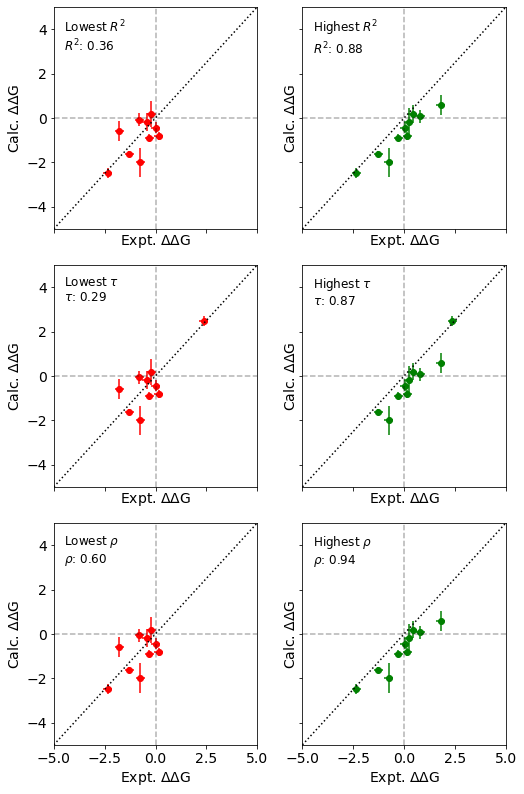

In [7]:
f, axes = plt.subplots(3,2,figsize=(7.5,7.5*1.5),sharey=True,sharex=True)

r = results['worst R']
a = axes[0][0]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='red')
a.scatter(r['x'], r['y'],color='red')
a.text(0.05, 0.95, r'Lowest $R^2$'+'\n'+r'$R^2$: '+f'{worst_r:.2f}',transform=a.transAxes, fontsize=12, va='top')


r = results['best R']
a = axes[0][1]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='green')
a.scatter(r['x'], r['y'],color='green')
a.text(0.05, 0.95, r'Highest $R^2$'+'\n'+r'$R^2$: '+f'{best_r:.2f}',transform=a.transAxes, fontsize=12, va='top')


r = results['worst tau']
a = axes[1][0]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='red')
a.scatter(r['x'], r['y'],color='red')
a.text(0.05, 0.95, r'Lowest $\tau$'+'\n'+r'$\tau$: '+f'{worst_tau:.2f}',transform=a.transAxes, fontsize=12, va='top')

r = results['best tau']
a = axes[1][1]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='green')
a.scatter(r['x'], r['y'],color='green')
a.text(0.05, 0.95, r'Highest $\tau$'+'\n'+r'$\tau$: '+f'{best_tau:.2f}',transform=a.transAxes, fontsize=12, va='top')

r = results['worst rho']
a = axes[2][0]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='red')
a.scatter(r['x'], r['y'],color='red')
a.text(0.05, 0.95, r'Lowest $\rho$'+'\n'+r'$\rho$: '+f'{worst_rho:.2f}',transform=a.transAxes, fontsize=12, va='top')

r = results['best rho']
a = axes[2][1]
a.errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='green')
a.scatter(r['x'], r['y'],color='green')
a.text(0.05, 0.95, r'Highest $\rho$'+'\n'+r'$\rho$: '+f'{best_rho:.2f}',transform=a.transAxes, fontsize=12, va='top')


limit = (-5,5)
for i in range(0,3):
    for j in range(0,2):
        axes[i][j].set_xlabel('Expt. '+r'$\Delta\Delta$G')
        axes[i][j].set_ylabel('Calc. '+r'$\Delta\Delta$G')
        axes[i][j].set_xlim(limit)
        axes[i][j].set_ylim(limit)
        axes[i][j].plot(limit,limit, 'k:')
        axes[i][j].plot(limit,[0,0], 'k--',alpha=0.3)
        axes[i][j].plot([0,0],limit, 'k--',alpha=0.3)
        
plt.tight_layout()
plt.savefig('relativeissuesB.pdf')
plt.show()

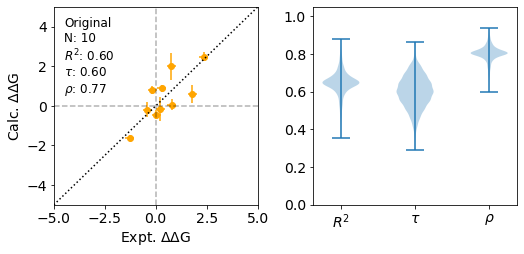

In [8]:
f, axes = plt.subplots(1,2,figsize=(7.5,7.5/2))

r = results['Original']
axes[0].errorbar(r['x'], r['y'], xerr=r['xerr'],yerr=r['yerr'],linestyle='none',color='orange')
axes[0].scatter(r['x'], r['y'],color='orange')


axes[0].set_xlabel('Expt. '+r'$\Delta\Delta$G')
axes[0].set_ylabel('Calc. '+r'$\Delta\Delta$G')
R2 = stats.bootstrap_statistic(r['x'], r['y'],dy_true=r['xerr'],dy_pred=r['yerr'],statistic='R2')['mle']

tau = stats.bootstrap_statistic(r['x'], r['y'],dy_true=r['xerr'],dy_pred=r['yerr'],statistic='KTAU')['mle']

rho = stats.bootstrap_statistic(r['x'], r['y'],dy_true=r['xerr'],dy_pred=r['yerr'],statistic='rho')['mle']

axes[0].text(0.05, 0.95, r'Original'+'\n'+r'N: '+f'{n}'+'\n'+r'$R^2$: '+f'{R2:.2f}'+'\n'+r'$\tau$: '+f'{tau:.2f}'+'\n'+r'$\rho$: '+f'{rho:.2f}',transform=axes[0].transAxes, fontsize=12, va='top')


axes[1].violinplot([historyR,historytau,historyrho])
axes[1].set_xticks(np.arange(1, 4))
axes[1].set_xticklabels([r'$R^2$',r'$\tau$',r'$\rho$'])
limit = (-5,5)

axes[0].set_xlim(limit)
axes[0].set_ylim(limit)
axes[0].plot(limit,limit, 'k:')
axes[0].plot(limit,[0,0], 'k--',alpha=0.3)
axes[0].plot([0,0],limit, 'k--',alpha=0.3)
axes[1].set_ylim(0.,1.05)
plt.tight_layout()
plt.savefig('relativeissuesA.pdf')
plt.show()

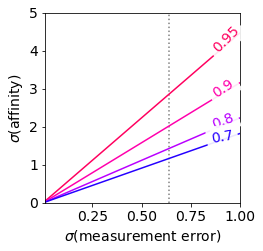

In [9]:
desired_R_max = [0.7, 0.8, 0.9, 0.95]
measurement_error = np.linspace(0.01,1.,20)

from matplotlib import cm 

cmap = cm.get_cmap('hsv')

rgba = cmap(0.5)

plt.figure(figsize=(3.5,3.5))

angle = np.linspace(45, 10, 4)

for i, Rmax in enumerate(desired_R_max[::-1],1):
    y = []
    for m in measurement_error:
        aff = m / (1-Rmax)**0.5
        y.append(aff)
    plt.plot(measurement_error,y,color=cmap(Rmax))
    plt.text(measurement_error[-3]-0.05, y[-3]-0.05,f'{Rmax}',color=cmap(Rmax), rotation=angle[i-1], bbox=dict(fc='white',ec='white',alpha=0.9))
        
plt.xlabel(r'$\sigma(\mathrm{measurement\ error})$')
plt.ylabel(r'$\sigma(\mathrm{affinity})$')

plt.vlines(0.64,0,5,linestyles='dotted',color='grey')
plt.ylim(0,5)
plt.xlim(measurement_error[0],measurement_error[-1])

# plt.show()
plt.savefig('R2max.pdf')

In [10]:
import pandas as pd

df = pd.read_csv('moonshot_activity_data.csv')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


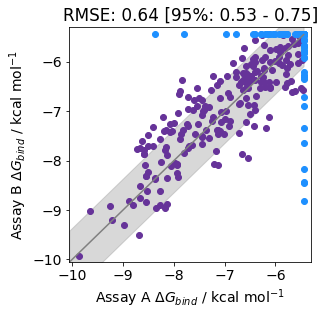

In [11]:
rapidfire = df['r_avg_IC50']
fluoresence = df['f_avg_IC50']

plt.figure(figsize=(4.8,4.8))
plt.subplots_adjust(bottom=.2, left=.2)

def _ic50_to_dG(x,s_conc=375E-9,Km=40E-6):
    Ki = (x*1E-6) / (1 + (s_conc/Km))
    return 0.59*np.log(Ki)

top = _ic50_to_dG(99.)
bottom = _ic50_to_dG(0.04)
error = 0.64
import math



active_a = []
active_b = []
non_active_a = []
non_active_b = []
for a,b in zip(rapidfire, fluoresence):
    if math.isnan(a) or math.isnan(b):
        continue
    else:
        if a == 99. or b == 99.5:
            non_active_a.append(_ic50_to_dG(a))
            non_active_b.append(_ic50_to_dG(b))
        else:
            active_a.append(_ic50_to_dG(a))
            active_b.append(_ic50_to_dG(b))
        
plt.plot([bottom,top],[bottom,top],linestyle='-',color='grey')
plt.fill_between([bottom,top],[bottom-error,top-error],[bottom+error,top+error],linestyle='-',color='grey',alpha=0.3)

plt.scatter(active_a, active_b,alpha=1,color='rebeccapurple')
plt.scatter(non_active_a, non_active_b,alpha=1,color='dodgerblue')

plt.xlim(bottom, top+0.15)
plt.ylim(bottom, top+0.15)


plt.xlabel(r'Assay A $\Delta G_{bind}$ / kcal mol$^{-1}$')
plt.ylabel(r'Assay B $\Delta G_{bind}$ / kcal mol$^{-1}$')

all_values = stats.bootstrap_statistic(active_a+non_active_a, active_b+non_active_b,statistic='RMSE')
good_values = stats.bootstrap_statistic(active_a, active_b,statistic='RMSE')

plt.title(f'RMSE: {all_values["mle"]:.2f} [95%: {all_values["low"]:.2f} - {all_values["high"]:.2f}]')
plt.savefig('moonshot-assays.pdf')